Earth is the third planet from the Sun and the only place known in the universe where life has originated and found habitability. While Earth may not contain the largest volumes of water in the Solar ...
['Earth', 'third', 'planet', 'Sun', 'only', 'place', 'known', 'universe', 'where', 'life', 'has', 'originated', 'found', 'habitability.', 'While', 'Earth', 'may', 'not', 'contain', 'largest', 'volumes', 'water', 'Solar', 'System,', 'only', 'Earth', 'sustains', 'liquid', 'surface', 'water,', 'extending', 'over', '70.8%', 'Earth', 'ocean,', 'making', 'Earth', 'ocean', 'world.', "Earth's", 'polar', 'regions', 'currently', 'retain', 'most', 'all', 'other', 'water', 'large', 'sheets', 'ice', 'covering', 'ocean', 'land,', 'dwarfing', "Earth's", 'groundwater,', 'lakes,', 'rivers', 'atmospheric', 'water.', 'Land,', 'consisting', 'continents', 'islands,', 'extends', 'over', '29.2%', 'Earth', 'widely', 'covered', 'vegetation.', 'Below', "Earth's", 'surface', 'material', 'lies', "Earth's", 'crust

(-0.5, 599.5, 299.5, -0.5)

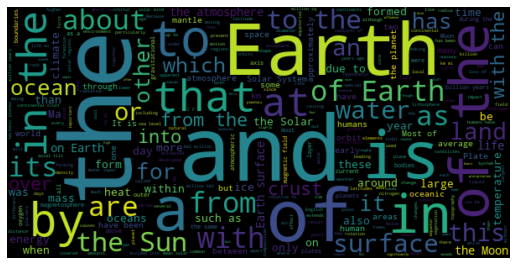

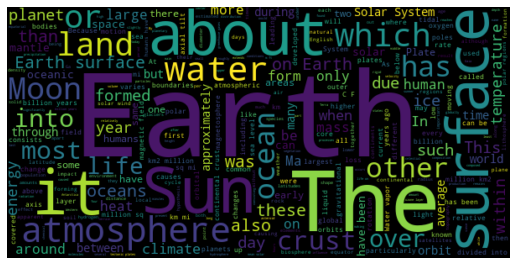

In [7]:
import requests
from collections import Counter  

def wikipedia_page(title): 
    ''' 
    This function returns the raw text of a wikipedia page  
    given a wikipedia page title 
    ''' 
    params = {  
        'action': 'query',  
        'format': 'json', # request json formatted content 
        'titles': title, # title of the wikipedia page 
        'prop': 'extracts',  
        'explaintext': True 
    } 
    # send a request to the wikipedia api  
    response = requests.get( 
         'https://en.wikipedia.org/w/api.php', 
         params= params 
     ).json() 
 
    # Parse the result 
    page = next(iter(response['query']['pages'].values())) 
    # return the page content  
    if 'extract' in page.keys(): 
        return page['extract'] 
    else: 
        return "Page not found" 
  

text = wikipedia_page("Earth")
print(text[:200]+"...")


# this is the url for Alice in Wonderland 
result = requests.get('http://www.gutenberg.org/files/11/11-0.txt') 
#print(result.text) 

# import the wordcloud library 
from wordcloud import WordCloud 
# Instantiate a new wordcloud. 
wordcloud = WordCloud(random_state = 8, 
        normalize_plurals = False, 
        width = 600, height= 300, 
        max_words = 300, 
        stopwords = []) 
# Apply the wordcloud to the text. 
wordcloud.generate(text) 

import matplotlib.pyplot as plt 
# create a figure 
fig, ax = plt.subplots(1,1, figsize = (9,6)) 
# add interpolation = bilinear to smooth things out 
plt.imshow(wordcloud, interpolation='bilinear') 
# and remove the axis 
plt.axis("off")

words_list = text.split(' ') 
# define the list of words you want to remove from the text 
stopwords = ['the', 'of', 'and', 'is','to','in','a','from','by','that', 'with', 'this', 'as', 'an', 'are','its', 'at', 'for'] 
# use a python list comprehension to remove the stopwords from words_list 
words_without_stopwords = [ word for word in words_list if word not in stopwords ] 
print (words_without_stopwords)
#plot words without stopwords with imshow
wordcloud.generate(' '.join(words_without_stopwords))
fig, ax = plt.subplots(1,1, figsize = (9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
